<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [2]:
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn import metrics

plt.style.use('fivethirtyeight')

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [4]:
# pre checks of the dataset

In [5]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
print(boston.data.shape)

(506, 13)


In [7]:
print(boston.target.shape)

(506,)


In [8]:
# Load boston dataset to Pandas Dataframe

my_boston = pd.DataFrame(boston.data)
my_boston.columns = boston.feature_names
my_boston['MEDV']  = boston.target

my_boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# view shape of the dataset
my_boston.shape

(506, 14)

In [10]:
#view datatypes of the dataset
my_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:
# view count of null values by column

my_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
#basic summar ystat of the dataset

my_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# Unique value count by column
my_boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

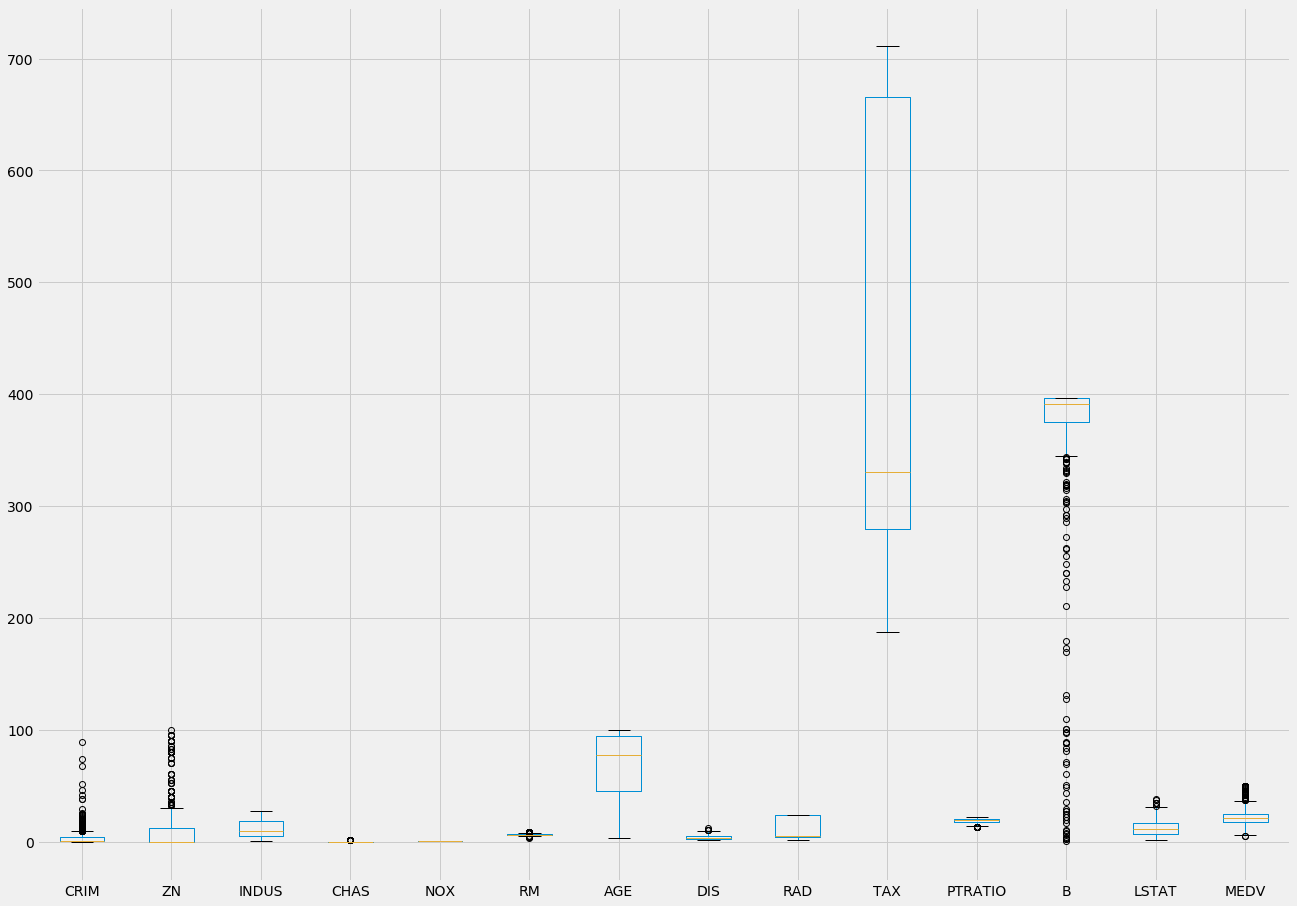

In [14]:
# box plot on all columns
ax = my_boston.plot(kind='box',figsize=(20,15))

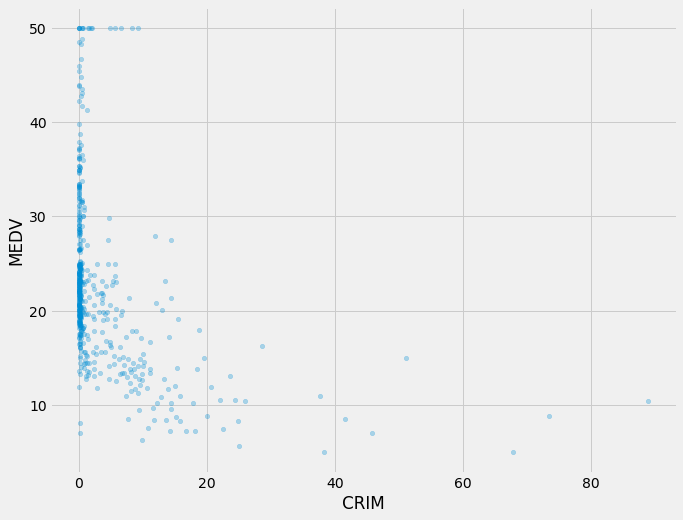

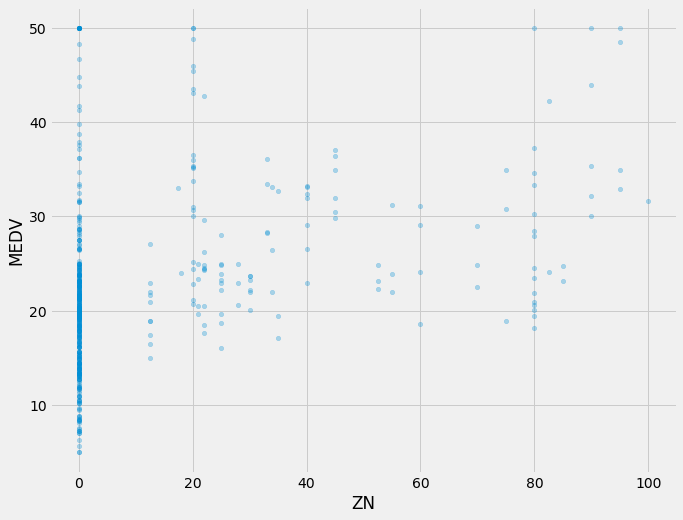

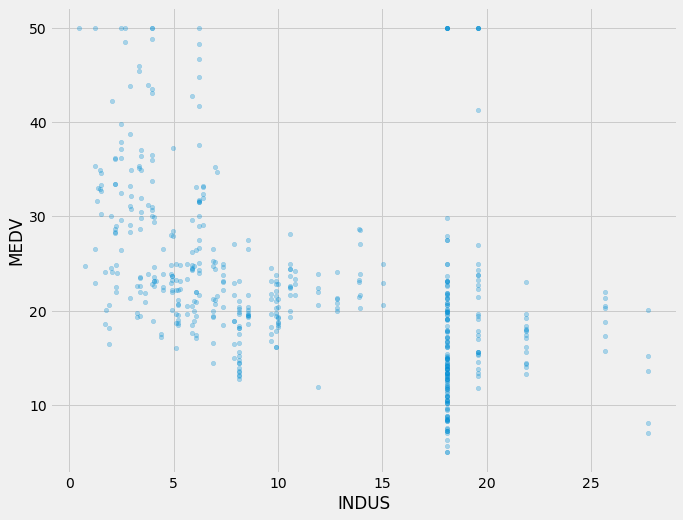

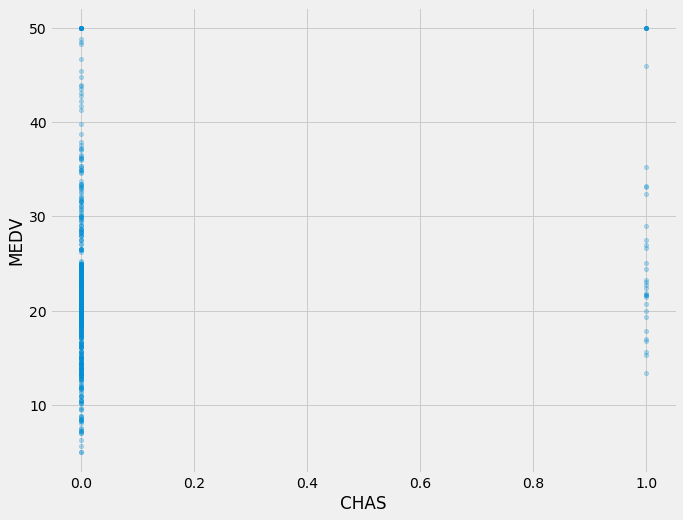

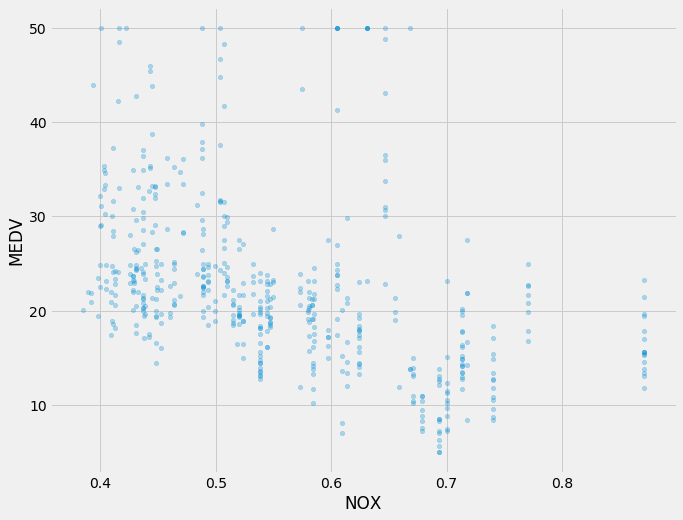

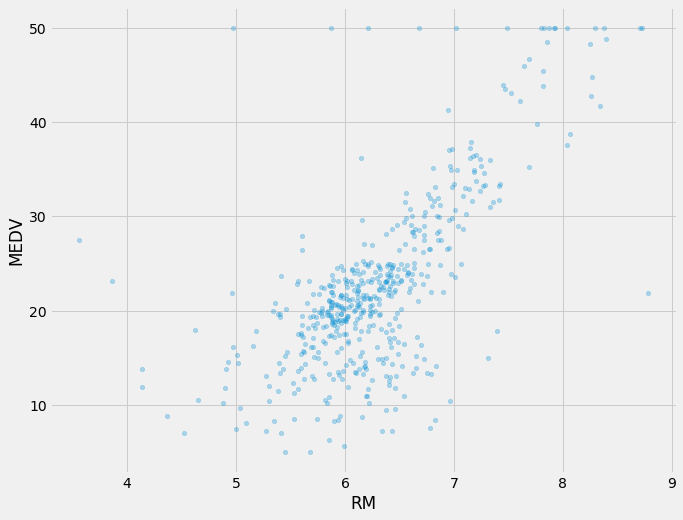

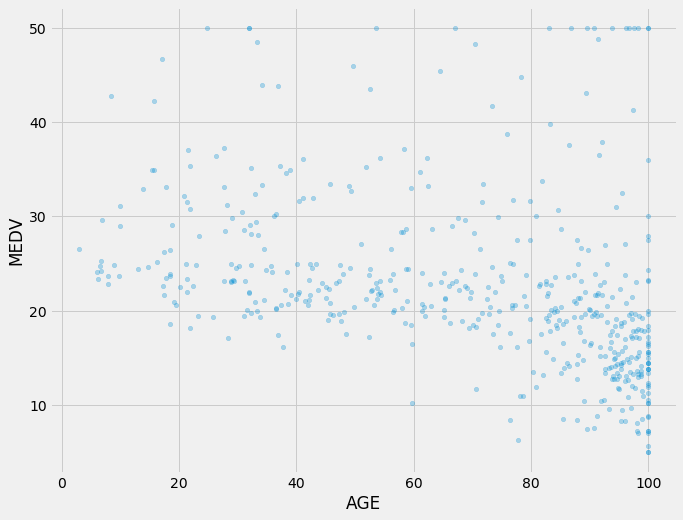

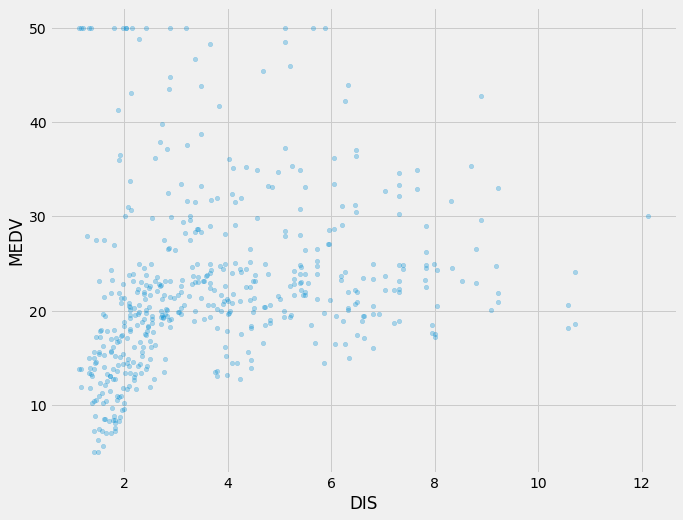

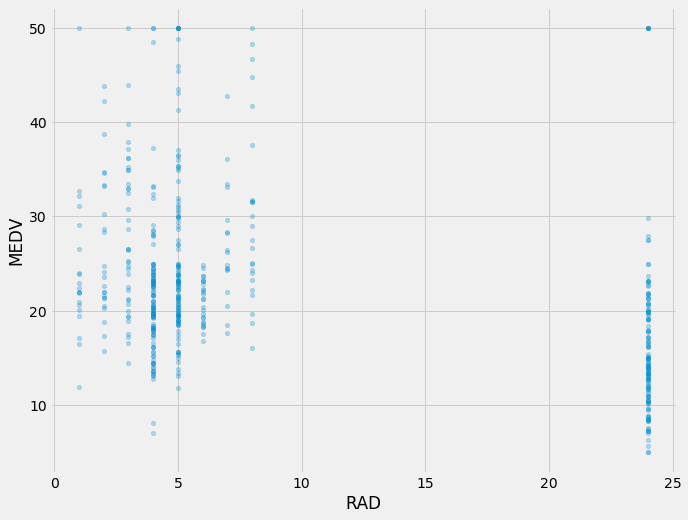

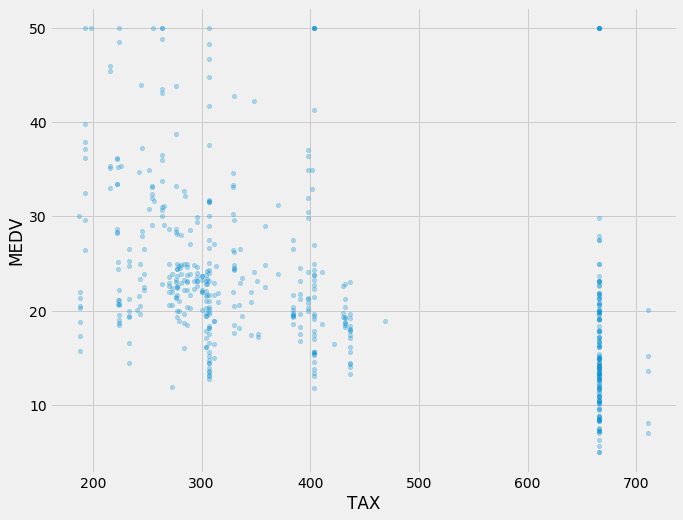

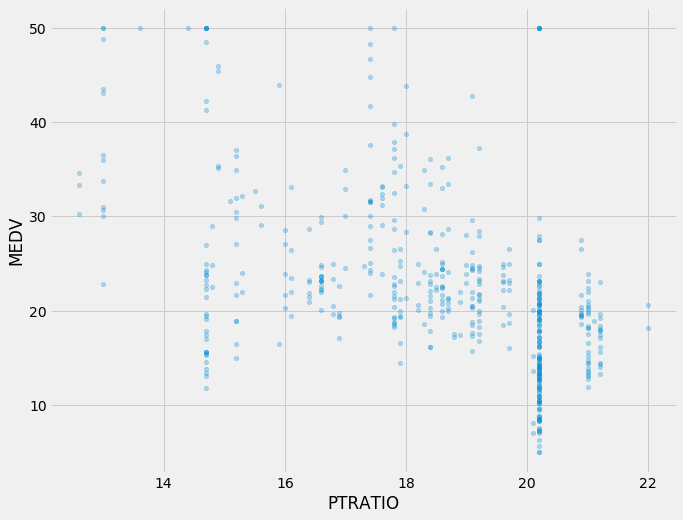

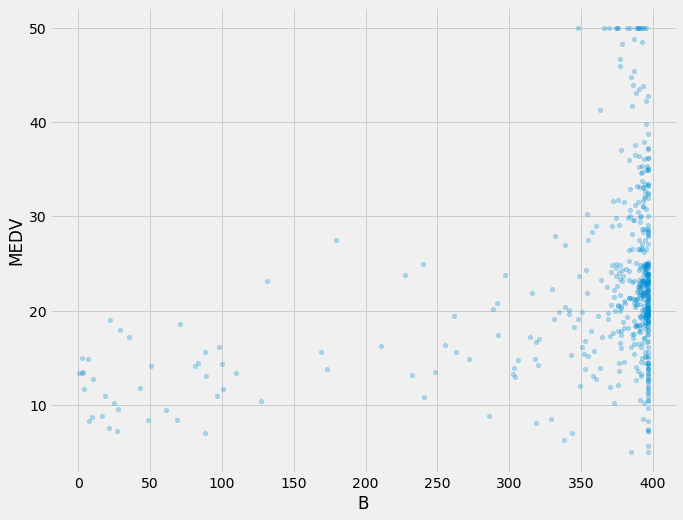

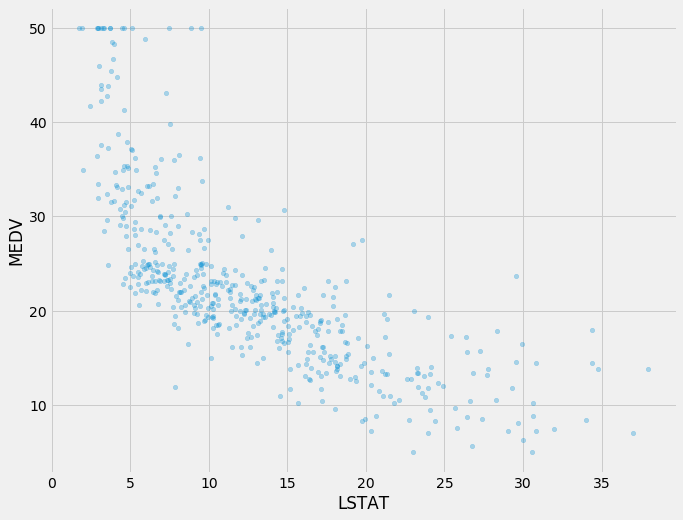

In [15]:
#Scatter plot of each colum with MEDV
for feature in boston.feature_names:
  ax = my_boston.plot(y='MEDV', x=feature, kind='scatter', figsize=(10,8),alpha=0.3)

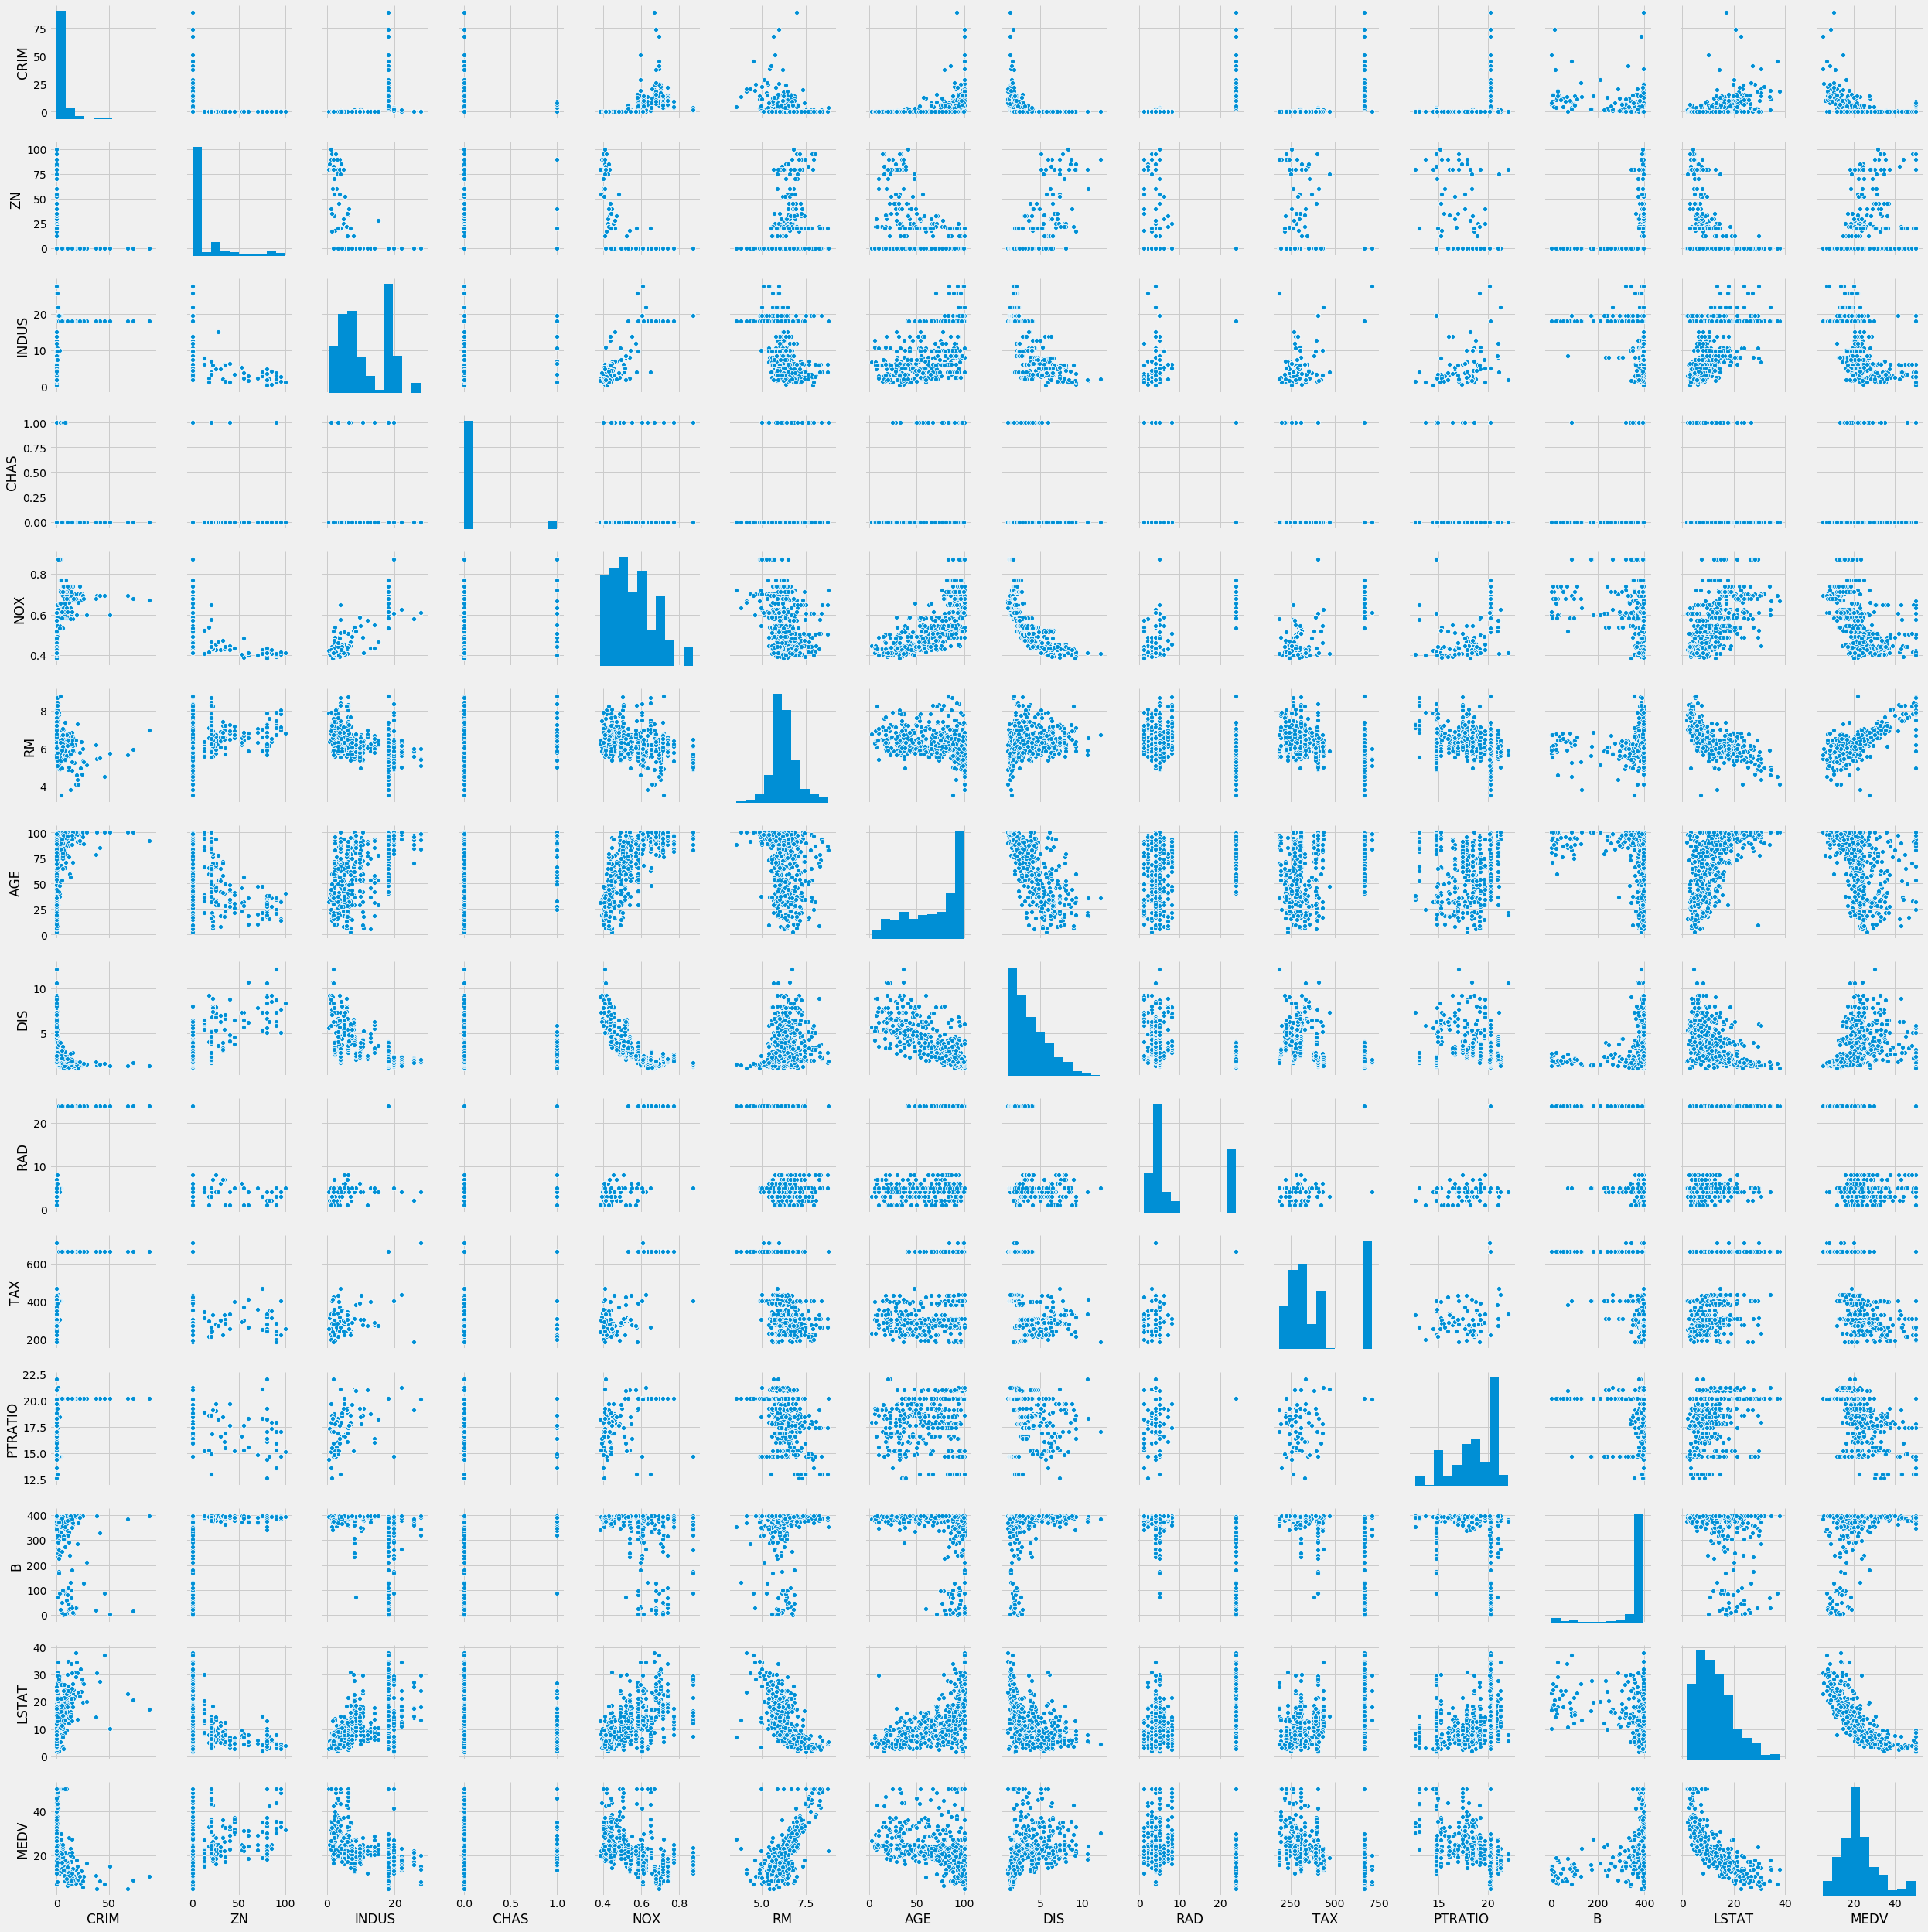

In [16]:
#Scatter matrix of all columns
g = sns.pairplot(my_boston)

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [17]:
# Define features and the output
X = my_boston.loc[:, boston.feature_names] 
y = my_boston.loc[:, 'MEDV']

In [18]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [20]:
# first create an array with the same shape as y and then fill it in the the mean value 
# /scrub/
null_pred = np.zeros(y.shape)
null_pred += np.mean(y)
null_pred

array([22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53280632,
       22.53280632, 22.53280632, 22.53280632, 22.53280632, 22.53

In [21]:
# Calculate MSE of null model
print('MSE of the null modell is :',metrics.mean_squared_error(null_pred, y))

MSE of the null modell is : 84.41955615616554


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [22]:
# Import the LinearRegression model,train_test_split classes & create an instance of LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr_boston = LinearRegression()

In [23]:
# Split train and test datasets as 70-30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
    
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(354, 13)
(152, 13)
(354,)
(152,)


In [24]:
#Train on training set
lr_boston.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# MSE on train dataset
y_pred_train = lr_boston.predict(X_train)
print('MSE on TRAIN dataset is :',metrics.mean_squared_error(y_train, y_pred_train))

MSE on TRAIN dataset is : 19.06739115538505


In [26]:
# MSE on test dataset
y_pred_test = lr_boston.predict(X_test)
print('MSE on TEST dataset is :',metrics.mean_squared_error(y_test, y_pred_test))

MSE on TEST dataset is : 29.79884430147879


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [27]:
#import LinearRegression model
from sklearn.linear_model import LinearRegression
# import model_selection
from sklearn import model_selection

# create an instance of model_selection with 10 fold. ensure dataset is shuffled
ten_fold = model_selection.KFold(n_splits=10, shuffle=True)


train_mse_values = []
test_mse_values = []
train_scores = []
test_scores = []
n = 0

print("-------------10 Fold Cross Validation-----------------")
print('')
for train_index, test_index in ten_fold.split(X, y):
    n += 1
    lr_boston = LinearRegression()
    lr_boston.fit(X.iloc[train_index, :], y.iloc[train_index]) #fit kth fold
    
    #predicting on training dataset
    y_pred_train = lr_boston.predict(X.iloc[train_index, :]) #predict on training dataset
    mse_train = metrics.mean_squared_error(y.iloc[train_index],y_pred_train) #calculate MSE on training dataset prediction
    train_mse_values.append(mse_train) #add train MSE to list
    
    train_scores.append(lr_boston.score(X, y)) #add train score to list
    
    print('Model {}'.format(n))
    print('Evaluating prediction on TRAIINING dataset... ') 
    print('MSE-TRAINSET: {}'.format(train_mse_values[n-1]))
    print('R2-TRAINSET: {}\n'.format(train_scores[n-1]))


    #predicting on test dataset
    y_pred_test = lr_boston.predict(X.iloc[test_index, :]) #predict on test dataset
    mse_test = metrics.mean_squared_error(y.iloc[test_index],y_pred_test) #calculate MSE on test dataset prediction
    test_mse_values.append(mse_test) #add test MSE to list
    
    test_scores.append(lr_boston.score(X, y)) #add test score to list
    
    print('Evaluating prediction on TEST dataset... ') 
    print('MSE-TEST: {}'.format(test_mse_values[n-1]))
    print('R2-TEST: {}\n'.format(test_scores[n-1]))
    

print("---------10 Fold Cross Validation - Evauation Summary-----------")
print('')
print('Prediction on TRAINING dataset ') 
print('Mean of MSE-TRAINSET for all folds: {}'.format(np.mean(train_mse_values)))
print('Mean of R2-TRAINSET for all folds: {}'.format(np.mean(train_scores)))
print('')
print('Prediction on TEST dataset ') 
print('Mean of MSE-TEST for all folds: {}'.format(np.mean(test_mse_values)))
print('Mean of R2-TEST for all folds: {}'.format(np.mean(test_scores)))



-------------10 Fold Cross Validation-----------------

Model 1
Evaluating prediction on TRAIINING dataset... 
MSE-TRAINSET: 21.71894500174896
R2-TRAINSET: 0.7389174958735496

Evaluating prediction on TEST dataset... 
MSE-TEST: 24.90896859142745
R2-TEST: 0.7389174958735496

Model 2
Evaluating prediction on TRAIINING dataset... 
MSE-TRAINSET: 22.193650828700086
R2-TRAINSET: 0.7398923517170093

Evaluating prediction on TEST dataset... 
MSE-TEST: 19.85733366085787
R2-TEST: 0.7398923517170093

Model 3
Evaluating prediction on TRAIINING dataset... 
MSE-TRAINSET: 21.02637600852737
R2-TRAINSET: 0.7388410671334289

Evaluating prediction on TEST dataset... 
MSE-TEST: 31.15178515136886
R2-TEST: 0.7388410671334289

Model 4
Evaluating prediction on TRAIINING dataset... 
MSE-TRAINSET: 21.882764758758327
R2-TRAINSET: 0.7397429455063971

Evaluating prediction on TEST dataset... 
MSE-TEST: 22.756063889345196
R2-TEST: 0.7397429455063971

Model 5
Evaluating prediction on TRAIINING dataset... 
MSE-TRAINS

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Mean MSE 21.78921285014898 on training dataset of the 10-fold cross validation is much smaller compared to the MSE 84.41955615616554 or the null model. This indicates that 10-fold cross validation is a better model for the prediction. The gap between the scores are larger. This is an indication of high variance.
 


- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

10 fold model did slightly better on the training dataset compared to the test dataset. However, the gap is low. Further, both scores are lower when comared to null model or 70-30 train/tet split. Therese are indication of high bias and low variance 

- How much of a bias problem does your model appear to have? Why do you say that?

The model seems to show a high bias. Reason for the conclusion is that the gap between training and test scores is low and these scores are farely low compared to the null model

- How much of a variance problem does your model appear to have? Why do you say that?

The model seems to show a low vairance. Reason for the conclusion is that the gap between training and test scores is low and these scores are farely low compared to the null model

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

Analysing the scatter plots, variables 'CHAS', 'RAD' & 'B' does not show a clear co-rellation to the 'MEDV'. Hence decided to remove these from the features list to build a new mode

In [28]:

X = X.drop(['CHAS','RAD','B'],axis='columns')
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33


In [29]:
#import LinearRegression model
from sklearn.linear_model import LinearRegression
# import model_selection
from sklearn import model_selection


# create an instance of model_selection with 10 fold. ensure dataset is shuffled
ten_fold = model_selection.KFold(n_splits=10, shuffle=True)


test_mse_values = []
test_scores = []
n = 0

print("-------------10 Fold Cross Validation-----------------")
print('')
for train_index, test_index in ten_fold.split(X, y):
    n += 1
    lr_boston = LinearRegression()
    lr_boston.fit(X.iloc[train_index, :], y.iloc[train_index]) #fit kth fold
    
    #predicting on test dataset
    y_pred_test = lr_boston.predict(X.iloc[test_index, :]) #predict on test dataset
    mse_test = metrics.mean_squared_error(y.iloc[test_index],y_pred_test) #calculate MSE on test dataset prediction
    test_mse_values.append(mse_test) #add test MSE to list
    
    test_scores.append(lr_boston.score(X, y)) #add test score to list
    
    print('Model {}'.format(n))
    print('Evaluating prediction on TEST dataset... ') 
    print('MSE-TEST: {}'.format(test_mse_values[n-1]))
    print('R2-TEST: {}\n'.format(test_scores[n-1]))
    

print("---------10 Fold Cross Validation - Evauation Summary-----------")
print('')
print('Prediction on TEST dataset ') 
print('Mean of MSE-TEST for all folds: {}'.format(np.mean(test_mse_values)))
print('Mean of R2-TEST for all folds: {}'.format(np.mean(test_scores)))

-------------10 Fold Cross Validation-----------------

Model 1
Evaluating prediction on TEST dataset... 
MSE-TEST: 31.693661646388293
R2-TEST: 0.715422669720799

Model 2
Evaluating prediction on TEST dataset... 
MSE-TEST: 19.007210922139297
R2-TEST: 0.7157331120348296

Model 3
Evaluating prediction on TEST dataset... 
MSE-TEST: 15.26119283639731
R2-TEST: 0.7163737639071714

Model 4
Evaluating prediction on TEST dataset... 
MSE-TEST: 17.485222555415444
R2-TEST: 0.7157678658924224

Model 5
Evaluating prediction on TEST dataset... 
MSE-TEST: 21.428141073796812
R2-TEST: 0.716374465356328

Model 6
Evaluating prediction on TEST dataset... 
MSE-TEST: 54.529131004352
R2-TEST: 0.7133784179385874

Model 7
Evaluating prediction on TEST dataset... 
MSE-TEST: 18.82410560802987
R2-TEST: 0.7155971403146775

Model 8
Evaluating prediction on TEST dataset... 
MSE-TEST: 28.03755726759509
R2-TEST: 0.7149750631381953

Model 9
Evaluating prediction on TEST dataset... 
MSE-TEST: 21.541436684061882
R2-TEST: 

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [30]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [31]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [32]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [33]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [34]:
#View dataset shape
iris.shape

(150, 6)

In [35]:
#View dataset data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [36]:
#View count of null values by column
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [37]:
#View basic summary statistics numeric variables
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [38]:
#View basic summary statistics non-numeric variables
iris.describe(include='object')

,species
count,150
unique,3
top,Iris-versicolor
freq,50


In [39]:
#View number of unique values for each column
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

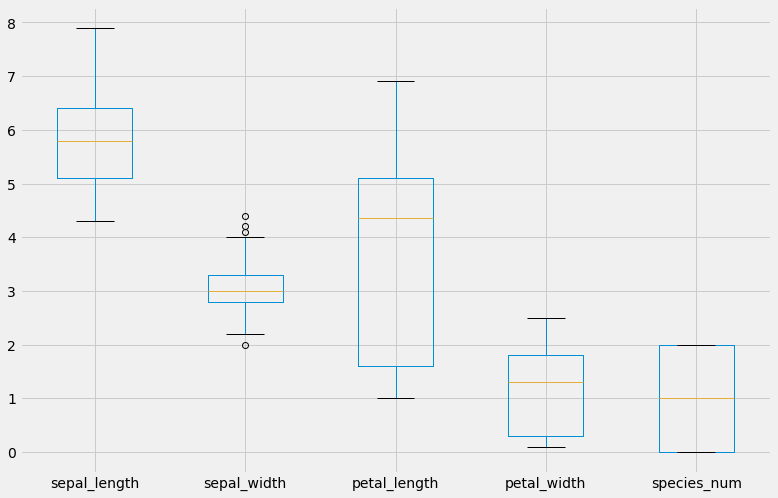

In [40]:
# box plot on all columns
ax = iris.plot(kind='box',figsize=(12,8))

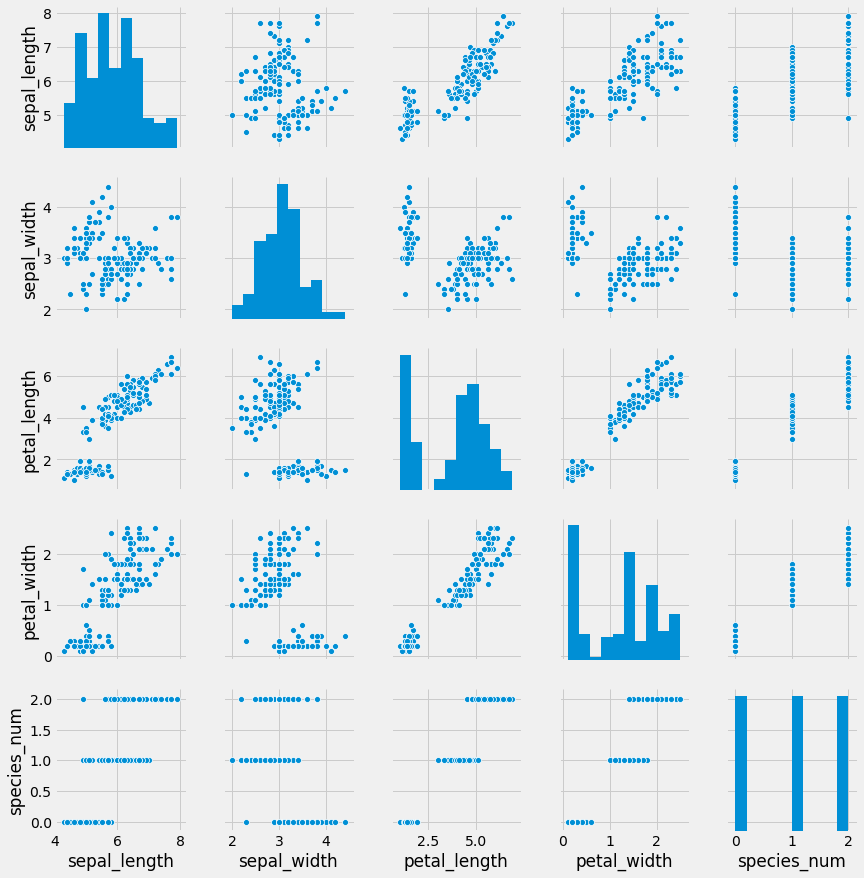

In [41]:
#Scatter matrix of all columns
g = sns.pairplot(iris)

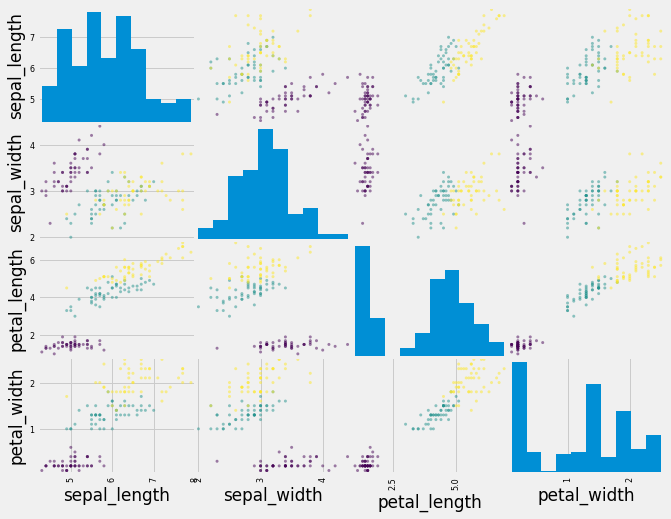

In [42]:
ax_array = pd.plotting.scatter_matrix(iris.drop('species_num', axis=1), c=iris.loc[:, 'species_num'],figsize=(10,8));

- Get the accuracy of a null model that simply predicts the most common species.

In [43]:
#Get most common species
most_common_species_num = iris.loc[:,'species_num'].value_counts().idxmax()
most_common_species_num

2

In [44]:
# Define features and the output
X = iris.loc[:, ['sepal_length','sepal_width','petal_length','petal_width']] 
y = iris.loc[:, 'species_num']

In [45]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

In [47]:
# first create an array with the same shape as y and then fill it in the the mean value 
# /scrub/
null_pred = np.zeros(y.shape)
null_pred += most_common_species_num
null_pred

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [48]:
# Cmpare predicting the mean every time to the true values
# /scrub/
null_accuracy = metrics.accuracy_score(null_pred, y)
print('Accuracy of the null prediction :',null_accuracy)

Accuracy of the null prediction : 0.3333333333333333


- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [52]:
#import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
# import model_selection
from sklearn import model_selection
# Instantiate and fit `StandardScaler`.
from sklearn.preprocessing import StandardScaler

# create an instance of model_selection with 10 fold. ensure dataset is shuffled
ten_fold = model_selection.KFold(n_splits=10, shuffle=True)


train_accuracy_scores = []
test_accuracy_scores = []
train_errors = []
test_errors = []
n = 0

print("-------------10 Fold Cross Validation-----------------")
print('')
for train_index, test_index in ten_fold.split(X, y):
    n += 1

    #standardising the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X.iloc[train_index, :])
    X_test = scaler.transform(X.iloc[test_index, :])    
    
    knn_iris = KNeighborsClassifier(n_neighbors=10)
    knn_iris.fit(X_train, y.iloc[train_index]) #fit kth fold
    
    #predicting on training dataset
    y_pred_train = knn_iris.predict(X.iloc[train_index, :]) #predict on training dataset
    accuracy = metrics.accuracy_score(y.iloc[train_index], y_pred_train) #calculate accuracy on training dataset prediction
    error = 1 - accuracy  #calculate error on training dataset prediction
    
    train_accuracy_scores.append(accuracy) #add train accuracy to list
    train_errors.append(error) #add train error to list
    
 
    print('Model {}'.format(n))
    print('Evaluating prediction on TRAIINING dataset... ') 
    print('Accuracy_Score-TRAINSET: {}'.format(train_accuracy_scores[n-1]))
    print('Error-TRAINSET: {}\n'.format(train_errors[n-1]))


    #predicting on test dataset
    y_pred_test = knn_iris.predict(X.iloc[test_index, :]) #predict on test dataset
    accuracy = metrics.accuracy_score(y.iloc[test_index],y_pred_test) #calculate accuracy on test dataset prediction
    error = 1 - accuracy  #calculate error on test dataset prediction
    
    test_accuracy_scores.append(accuracy) #add test accuracy to list
    test_errors.append(error) #add test error to list
    
    print('Evaluating prediction on TEST dataset... ') 
    print('Accuracy_Score-TEST: {}'.format(test_accuracy_scores[n-1]))
    print('Error-TEST: {}\n'.format(test_errors[n-1]))
    

print("---------10 Fold Cross Validation - Evauation Summary-----------")
print('')
print('Prediction on TRAINING dataset ') 
print('Mean of Accuracy_Score-TRAINSET for all folds: {}'.format(np.mean(train_accuracy_scores)))
print('Mean of Error-TRAINSET for all folds: {}'.format(np.mean(train_errors)))
print('')
print('Prediction on TEST dataset ') 
print('Mean of Accuracy_Score-TEST for all folds: {}'.format(np.mean(test_accuracy_scores)))
print('Mean of Error-TEST for all folds: {}'.format(np.mean(test_errors)))


-------------10 Fold Cross Validation-----------------

Model 1
Evaluating prediction on TRAIINING dataset... 
Accuracy_Score-TRAINSET: 0.3111111111111111
Error-TRAINSET: 0.6888888888888889

Evaluating prediction on TEST dataset... 
Accuracy_Score-TEST: 0.5333333333333333
Error-TEST: 0.4666666666666667

Model 2
Evaluating prediction on TRAIINING dataset... 
Accuracy_Score-TRAINSET: 0.32592592592592595
Error-TRAINSET: 0.674074074074074

Evaluating prediction on TEST dataset... 
Accuracy_Score-TEST: 0.4
Error-TEST: 0.6

Model 3
Evaluating prediction on TRAIINING dataset... 
Accuracy_Score-TRAINSET: 0.32592592592592595
Error-TRAINSET: 0.674074074074074

Evaluating prediction on TEST dataset... 
Accuracy_Score-TEST: 0.4
Error-TEST: 0.6

Model 4
Evaluating prediction on TRAIINING dataset... 
Accuracy_Score-TRAINSET: 0.3333333333333333
Error-TRAINSET: 0.6666666666666667

Evaluating prediction on TEST dataset... 
Accuracy_Score-TEST: 0.3333333333333333
Error-TEST: 0.6666666666666667

Model 5


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model did not perform any better or worse compared to the null model. Model seems to have a high bias

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model did not perform any better or worse compared to the null model. Model seems to have a high bias

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Model seems to have a high bias

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [65]:
#import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
# import model_selection
from sklearn import model_selection
# Instantiate and fit `StandardScaler`.
from sklearn.preprocessing import StandardScaler

# create an instance of model_selection with 10 fold. ensure dataset is shuffled
ten_fold = model_selection.KFold(n_splits=10, shuffle=True)


test_accuracy_scores = []
test_errors = []
n = 0

for train_index, test_index in ten_fold.split(X, y):
    n += 1

    #standardising the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X.iloc[train_index, :])
    X_test = scaler.transform(X.iloc[test_index, :])    
    
    knn_iris = KNeighborsClassifier(n_neighbors=2)
    knn_iris.fit(X_train, y.iloc[train_index]) #fit kth fold
    
    #predicting on test dataset
    y_pred_test = knn_iris.predict(X.iloc[test_index, :]) #predict on test dataset
    accuracy = metrics.accuracy_score(y.iloc[test_index],y_pred_test) #calculate accuracy on test dataset prediction
    error = 1 - accuracy  #calculate error on test dataset prediction
    
    test_accuracy_scores.append(accuracy) #add test accuracy to list
    test_errors.append(error) #add test error to list
    
    

print("---------10 Fold Cross Validation - Evauation Summary-----------")
print('')
print('Prediction on TEST dataset ') 
print('Mean of Accuracy_Score-TEST for all folds: {}'.format(np.mean(test_accuracy_scores)))
print('Mean of Error-TEST for all folds: {}'.format(np.mean(test_errors)))

-------------10 Fold Cross Validation-----------------

---------10 Fold Cross Validation - Evauation Summary-----------

Prediction on TEST dataset 
Mean of Accuracy_Score-TEST for all folds: 0.33333333333333337
Mean of Error-TEST for all folds: 0.6666666666666667


Value for k was adjusted between 1 and 100 but did not see any improvement

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

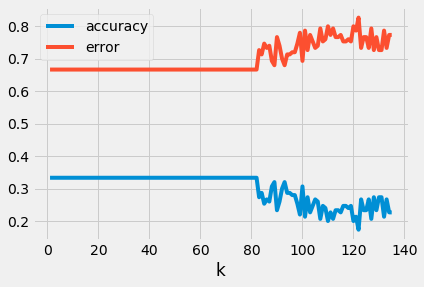

In [74]:
#import KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
# import model_selection
from sklearn import model_selection
# Instantiate and fit `StandardScaler`.
from sklearn.preprocessing import StandardScaler

# create an instance of model_selection with 10 fold. ensure dataset is shuffled
ten_fold = model_selection.KFold(n_splits=10, shuffle=True)

#function to get a mean accuracy from  10 fold CV for a specific k value
def get_model_accuracy(k_value):
    test_accuracy_scores = []
    test_errors = []
    n = 0

    for train_index, test_index in ten_fold.split(X, y):
        n += 1

        #standardising the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X.iloc[train_index, :])
        X_test = scaler.transform(X.iloc[test_index, :])    

        knn_iris = KNeighborsClassifier(n_neighbors=k_value)
        knn_iris.fit(X_train, y.iloc[train_index]) #fit kth fold

        #predicting on test dataset
        y_pred_test = knn_iris.predict(X.iloc[test_index, :]) #predict on test dataset
        accuracy = metrics.accuracy_score(y.iloc[test_index],y_pred_test) #calculate accuracy on test dataset prediction
        error = 1 - accuracy  #calculate error on test dataset prediction

        test_accuracy_scores.append(accuracy) #add test accuracy to list
        test_errors.append(error) #add test error to list

    return np.mean(test_accuracy_scores), np.mean(test_errors)

#getting accuracy of the model for each k between 1 - 135
scores_by_k = []
for number in range(1, 136):
    k_value = number
    accuracy, error = get_model_accuracy(number)
    scores_by_k.append([k_value,accuracy,error])
    

# load scores in a DataFrame
df_scores = pd.DataFrame(scores_by_k, columns=['k','accuracy','error'])

# Plot training scores against k
ax = df_scores.plot(x='k', y='accuracy')
df_scores.plot(x='k', y='error',ax=ax);




As per the plot, it can be concluded that changing the k value between 1 and 80 had no effect on the model. However, incrwasing the k value above 80 made the model accuracy to worse

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [7]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
